<a href="https://colab.research.google.com/github/DannyRMoreno28/Machine-Learning/blob/main/Clasificacion_imagenes_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clasificación de imágenes utilizando redes neuronales simples (Conceptos básicos)**

*Autor*

Danny Alexander Rojas Moreno

> [LinkedIn](https://www.linkedin.com/in/danny-alexander-rojas-moreno-a343a2196/)

> dannymoreno.2805@gmail.com

#**Introducción**

El presente proyecto tiene por finalidad explicar el paso a paso en la creación de un sistema de clasificación de imágenes utilizado conceptos básicos de las librerías de Keras y TensorFlow –reconocidas librerías en el ámbito de las redes neuronales.  Además de estas dos librerías, fueron utilizadas librerías tradicionales en la ciencia de datos como Numpy y Matplotlib, empleadas para cálculos matemáticos y visualización de gráficas, respectivamente. 

MNIST fue la base de datos utilizadas para desarrollar el modelo de clasificación de imágenes de este proyecto. Esta base de datos contiene 70.000 imágenes de dígitos numéricos manuscritos, las cuales fueron previamente estandarizadas a una caja de 28x28 píxeles.

Imagen 1. Imágenes de muestra del conjunto de datos MNIST
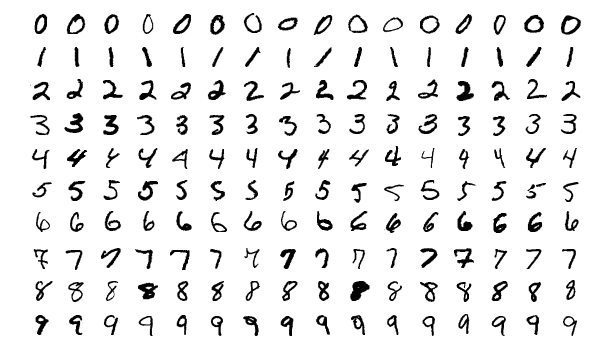


>**Objetivo especifico**

Crear y entrenar un modelo que tome una imagen de un dígito escrito a mano como entrada y prediga la clase de ese dígito, es decir, su valor númerico.

#**1. Entendimiento de los datos**

In [1]:
# Importar base de datos MNIST
from keras.datasets import mnist

In [2]:
# Dividir los datos en conjunto de entrenamiento (train) y prueba (test).
# Por defecto el conjunto de entrenamiento es compuesto por 60.000 imágenes y los 10.000 restantes harán parte del grupo de prueba.
 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Imprimir las dimensiones de cada subconjunto de datos.

print('Dimensiones de los vectores')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los vectores
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


La base de datos MNIST tiene una dimensión de (70.000, 784); 70.000 imágenes y 784 columnas que representan cada una un pixel (28 x 28 = 784). 

Al realizar la división del dataset MNIST observamos las siguientes características en los subconjuntos de entrenamiento y prueba: 


*   *X_train* contiene 60mil imágenes y los valores numéricos de los píxeles que identifican cada imagen.
*   *y_train* contiene las 60mil etiquetas que identifican cada imagen de entrenamiento.
*   *X_test* contiene 10mil imágenes y los valores numéricos de los píxeles que identifican cada imagen.
*   *y_test* contiene las 10mil etiquetas que identifican las imágenes del subconjunto de prueba.



In [4]:
# Importamos librerias basicas para el entendimiento de datos

import numpy as np # métodos matemáticos
from matplotlib import pyplot as plt # visualización de graficos
%matplotlib inline

## **Datos almacenados en la variable `X_train`**

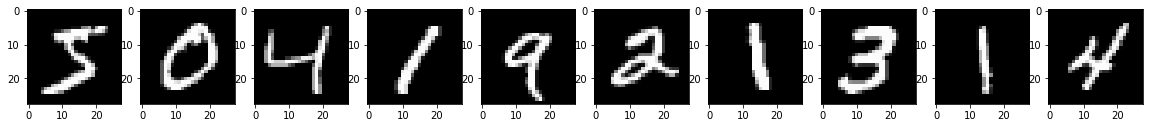

In [5]:
# Utilizamos un for para imprimir las 10 primeras imagenes (vector X_train)

fig, axs = plt.subplots(1,10, figsize = (20, 10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap = plt.get_cmap('gray'))

Por el momento nos concentraremos en la primera imagen que se imprimió (5). El digito 5 se encuentra ubicado en la posición 0 (primer elemento) del vector X_train y de este elemento tenemos las siguientes características:

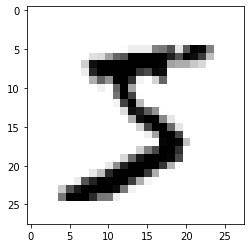

In [6]:
# Imprimir primer elmento almacenado en X_train

plt.imshow(X_train[0], cmap = 'binary')
plt.show()

In [7]:
# Catacteristicas del primer elemento almacenado en el vector X_train

print('Tipo:', type(X_train[0]))
print('Tamaño:', X_train[0].size, "elementos")
print('Dimensión:',X_train[0].shape)

Tipo: <class 'numpy.ndarray'>
Tamaño: 784 elementos
Dimensión: (28, 28)


In [8]:
print('Visualización de los valores pertenecientes a la posición 0 en array X_train (pixeles).\n')
print(X_train[0])

Visualización de los valores pertenecientes a la posición 0 en array X_train (pixeles).

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56 

In [9]:
# Valores unicos en el primer elmento de X_train

print(np.unique(X_train[0]))

[  0   1   2   3   9  11  14  16  18  23  24  25  26  27  30  35  36  39
  43  45  46  49  55  56  64  66  70  78  80  81  82  90  93  94 107 108
 114 119 126 127 130 132 133 135 136 139 148 150 154 156 160 166 170 171
 172 175 182 183 186 187 190 195 198 201 205 207 212 213 219 221 225 226
 229 238 240 241 242 244 247 249 250 251 252 253 255]


Cuando imprimirnos los valores únicos que conforman el array de primer elemento almacenado en X_train, encontramos que los valores de los pixeles de la imagen que pertenece al digito 5 van en una escala del 0 (más claro) al 225 (más oscuro).

##**Datos almacenados en la variable `y_train`**

In [10]:
# Valor almacenado en el vector y_train

y_train[0]

5

In [11]:
# Valores unicos que pertenecen al primer elmento de y_train

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Como se puede observar los elementos que contiene el vector `X_train` son todos aquellos elementos con los que se puede graficar la imagen y los pixeles que conforman cada digito manuscrito. Por otro lado, el vector `y_train` contiene las etiquetas o identificadores de cada dígito almacenado en el vector `X_train`. 

Los anteriores vectores serán los elementos utilizados para entrenar el modelo de clasificación, sin embargo, antes de iniciar con la crear y entrenar del modelo, se hace necesario codificar los valores de las etiquetas; para esto se empleará la técnica “One Hot Encoding” o “codificación en caliente”.


#**2. Codificación de las etiquetas (One Hot Encoding)**

La técnica One Hot Encoding es un proceso mediante el cual las variables categóricas son convertidas en 0 y 1, según sea el caso. La codificación de las etiquetas en los vectores binarios tiene por objetivo proporcionar a los algoritmos de Machine Learning hacer un mejor su trabajo en la predicción sin llegar a ser afectados por el sesgo.

A continuación, en la Tabla 1 se observa el valor codificado asignado determinada etiqueta.


Tabla 1. Representación de la codificación de una etiqueta.

|Vector|Posición| Etiqueta | Codificación de la etiqueta |
|------|------|------|------|
|y_train|[0]| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
|y_train|[1]| 0 | [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
|y_train|[2]| 4 | [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] |
|...|...| ... | [...] |

Para codificar las etiquetas en vectores binarios se usa la función `to_categorical` de la librería `Keras`, la cual nos devuelve una matriz en la cual cada elemento es codificada en un vector de 10 posiciones.

## **Codificación**

In [12]:
# Importar función
from tensorflow import keras
from keras.utils import to_categorical

In [13]:
# Almacenar las matrices vectoriales binarias en y_train_encoded y y_train_encoded

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## **Validación de la dimensionalidad**

In [14]:
# Imprimir las dimensiones de las variables que almacenan las etiquetas codificadas.

print('Dimensión de y_train codificada: ', y_train_encoded.shape)
print('Dimensión de y_test codificada: ', y_test_encoded.shape)

Dimensión de y_train codificada:  (60000, 10)
Dimensión de y_test codificada:  (10000, 10)


Al observar la anterior salida, podemos analizar que los elementos que almacenas las etiquetas de entrenamiento y prueba ` (y_train, y_test)`, presentan un vector de 10 elementos para cada etiqueta (recordemos que `t_train` contiene 60mil etiquetas, mientras que `y_test` 10mil.

## **Etiqueta codificada**

In [15]:
# Imprimir el vector codificado de las primeras 10 etiquetas en y_train
for i in range (10):
  print('Etiqueta:', y_train[i], ', codificación:', y_train_encoded[i])

Etiqueta: 5 , codificación: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Etiqueta: 0 , codificación: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: 4 , codificación: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Etiqueta: 1 , codificación: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: 9 , codificación: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Etiqueta: 2 , codificación: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: 1 , codificación: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: 3 , codificación: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Etiqueta: 1 , codificación: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Etiqueta: 4 , codificación: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#**3. Estandarización de los datos**

## **Eliminar vectores que componen cada matriz vectorial**

Antes de eliminar los vectores que componen la matriz vectorial que almacena los valores de los pixeles que componen cada imagen, es importante recordar que la dimensionalidad que caracteriza las variables de entrenamiento y prueba para `X` (`X_train` y `X_test`) son de 60mil y 10mil imágenes para entrenamiento y prueba, respectivamente. Además, cada uno de estas variables contienen una matriz vectorial de dimensión 28x28, que representa los pixeles que componen la imagen.

In [16]:
print('Dimensión de X_train', X_train.shape)
print('Dimensión de X_test', X_test.shape)

Dimensión de X_train (60000, 28, 28)
Dimensión de X_test (10000, 28, 28)


Para eliminar los vectores que componen la matriz vectorial se debe de utilizar la funcion `reshape` de la lubrenia `NumPy`, esta funcion permite convertir la matriz vectorial en una matriz con 784 elementos (28 x 28 = 784).

In [17]:
# Redimensión de las matrices vectoriales de entrenamiento y prueba

X_train_reshaped = np.reshape(X_train, (60000, 784))
X_test_reshaped = np.reshape(X_test, (10000, 784))

print('Redimensión de X_train_reshaped: ', X_train_reshaped.shape)
print('Redimensión de X_test_reshaped: ', X_test_reshaped.shape)

Redimensión de X_train_reshaped:  (60000, 784)
Redimensión de X_test_reshaped:  (10000, 784)


Al observar los nuevos valores que caracterizan los elementos que las variables redimensionadas observamos por ejemplo que el primer elemento de `X_train[0]` pasa de matriz compuesta de 28 vectores de 28 elementos cada uno (28x28), a una matriz de 784 elementos.

In [18]:
# Comparación entre las dimensiones del primer elemento de X_train y X_train_reshap
print(X_train[0].shape)
print(X_train_reshaped[0].shape)

(28, 28)
(784,)


## **Normalización de los datos**

Antes de dar paso a la creación del modelo de machine Lear Ning utilizando redes neuronales, se hace necesario realizar la normalización de los datos de entrada, con la finalidad disminuir el sesgo existente en el conjunto de dato. Esta normalización permite reducir la redundancia existente entre los datos, sin distorsionar las diferencias existentes entre los intervalos de los valores. Además de esto, la normalización permite que algunos algoritmos modelen los datos correctamente, como es nuestro caso.


La ecuación para el calcular normalizado es la siguiente:



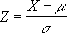

Donde:

*z* = valor normalizado.

*x* = valor a ser normalizado.

*μ* = media aritmética del conjunto de datos.

*σ* = desviación estandar del conjunto de datos.


In [19]:
# Valores únicos de los pixeles del primer elemento de X_train sin normalizar.
print(set(X_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [20]:
# Calcular la media y la desviación estándar del subconjunto redimensionado de entrenamiento 

x_mean = np.mean(X_train_reshaped)
x_std = np.std(X_train_reshaped)
#epsilon = 1e-10 

In [21]:
# Imprimir media y desviación estándar

print('media de X_train: ', x_mean)
print('std de X_train: ', x_std)

media de X_train:  33.318421449829934
std de X_train:  78.56748998339798


In [22]:
# Normalizar los datos que componen la matriz de pixeles del subconjunto X_train 

X_train_norm = (X_train_reshaped - x_mean) / (x_std)
X_test_norm = (X_test_reshaped - x_mean) / (x_std)

In [23]:
# Valores unicos normalizados de los pixeles del primer elemento de X_train[0]

print(set(X_train_norm[0]))

{-0.3858901621553201, 1.3069219669849146, 1.1796428595307615, 1.8033104860561113, 1.6887592893473735, 2.821543345689335, 2.7197200597260127, 1.192370770276177, 1.53602436040239, 1.7396709323290347, 2.7960875241985046, 2.6560805059989363, 2.18514780841857, 2.4906176663085375, -0.10587612575618353, 2.681536327489767, 0.03413089244338476, -0.19497150097409063, 0.7723497156774721, 0.9378125553678709, -0.2458831439557518, 2.210603629909401, 1.9051337720194337, 1.2687382347486686, 1.7651267538198654, -0.424073894391566, 0.41596821480584373, -0.2840668761919977, 0.27596119660627544, 1.4596568959298981, 1.2941940562394993, 2.096052433200663, 1.9560454150010949, 2.7579037919622587, 1.4851127174207288, -0.09314821501076823, 2.783359613453089, 2.286971094381893, 2.4524339340722916, 1.3451056992211605, -0.042236572029107036, 2.643352595253521, -0.13133194724701414, 0.7596218049320568, 0.28868910735169073, 0.6068868759870732, 0.6196147867324885, -0.4113459836461507, 0.46687985778750496, 0.950540466

In [24]:
print(type(X_train_norm[0]))

<class 'numpy.ndarray'>


#**4. Creación del modelo de ML**

## **¿Que son y como funcionan las redes neuronales?**

Las redes neuronales (RN) son un tipo de algoritmo de aprendizaje automático inspirado en la forma en que funciona el cerebro humano. Las RN están compuestas por capas de "neuronas" artificiales que se conectan entre sí, y se utilizan para resolver problemas complejos como el reconocimiento de patrones, el procesamiento de lenguaje natural y la toma de decisiones.

Imagen 2. Partes de una neurona.

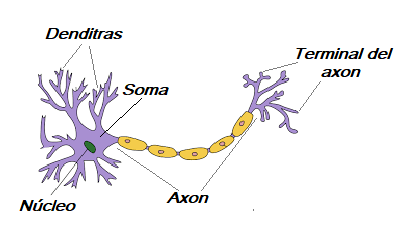

Para entender cómo funcionan las redes neuronales, es importante entender cómo funciona una neurona individual. Una neurona artificial (perceptrón) toma un conjunto de entradas $(Xn)$, los cuales se combinan mediante unos pesos $(Wn)$. La salida de esta neurona $(Y)$, obtenida mediante una función de activación se utiliza como entrada en la siguiente capa de neuronas.

Imagen 3. Estructura simple de un perceptrón.

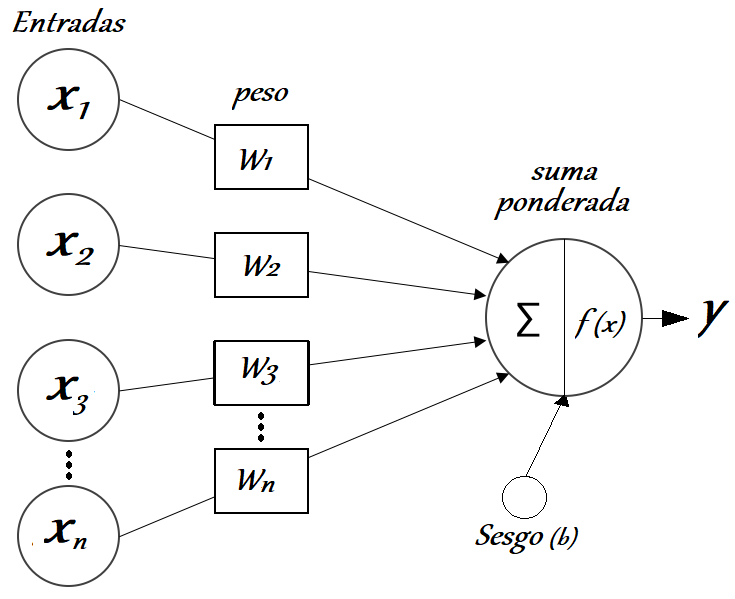

La anterior imagen se puede representar por medio de  la ecuación:

\begin{equation}
Y = (X1 * W1) + (X2 * W2) + (X3 * W3) + (...) + (Xn * Wn) + b
\end{equation}

Sin embargo, la anterior ecuación que representa un perceptrón de tres entradas, también se puede vectorizar de forma más sencilla:

\begin{equation}
Y = W . X + b
\end{equation}

Donde, *X* representa el dato de ingreso (X1, X2, X3), *W* el pesos (W1, W2, W3) y *b* es denominado sesgo. El punto (.) representa el producto escalar entre los vectores W y X. Esta ecuación se utiliza para calcular la salida de una neurona en un perceptrón, donde se combinan las entradas mediante los pesos y se añade el sesgo (bias). Esto nos da la versión vectorizada de nuestra ecuación lineal.

La idea detrás de las redes neuronales es que a medida que las entradas pasan a través de las capas de neuronas, el algoritmo "aprende" a detectar patrones y relaciones en los datos, permitiendo que la red realice tareas complejas. Sin embargo, un enfoque simple y lineal para resolver el problema de clasificación de imágenes escritas a mano: ¿podría funcionar?

##**Etapa de creación y compilación de la red neuronal - `.Sequential` y `.compile`**

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

In [26]:
# Especificar las caracteristicas del modelo (modelo compuesta de 3 capas)

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784, )), # 1ra capa
    Dense(128, activation = 'relu'),                        # 2da capa  
    Dense(10, activation = 'softmax')                       # 3ra capa 
])

El anterior conjunto de líneas de código, crea una red neuronal feedforward de tres capas, donde la primera capa tiene 128 neuronas, y recibe una entrada de 784 elementos. La segunda capa también tiene 128 neuronas y recibe la salida generada por la primera capa. Por ultimo, la tercera es compuesta por 10 neuronas encargadas de generar las salida. 

Es importante aclarar que una red neuronal feedforward es un tipo de red en la que las señales solo viajan en una unica dirección, desde las entradas hasta las salidas, sin retroalimentación o ciclos. 

> Caracteristicas de la red neuronal

* model = `Sequential`()
, crea una nueva instancia de una red neuronal secuencial, que es un tipo de red neuronal feedforward donde las capas se conectan una después de la otra en un orden lineal.

* Dentro de los corchetes [ ], se especifican las capas de la red neuronal.


* `Dense`(128, `activation` = 'relu', `input_shap`e = (784, )), es la primera capa de la red neuronal y es una capa densa, lo que significa que cada neurona de esta capa está conectada a todas las entradas anteriores. El número 128 especifica el número de neuronas en esta capa. La función de activación especificada es 'relu' (rectified linear unit), que es una función de activación comúnmente utilizada en redes neuronales. La forma de entrada especificada es (784, ), lo que significa que la red neuronal espera recibir una entrada de 784 elementos.

* `Dense`(128, `activation` = 'relu'), es la segunda capa de la red neuronal y es similar a la primera capa, con 128 neuronas y la función de activación 'relu'.

* `Dense`(10, `activation` = 'softmax'), es la tercera capa de la red neuronal, con 10 neuronas y una función de activación "softmax", que se utiliza comúnmente en las capas de salida de las redes neuronales para convertir las salidas en una distribución de probabilidad.

In [34]:
# Complización y configuracación del modelo 

model.compile(
    # Optimizador
    optimizer = 'SGD', # Stochastic Gradient Descent
    # Función de pérdida para minimizar 
    loss = 'categorical_crossentropy', # Se utilizará cuando haya varias clases de etiquetas (2 o más)
    # Lista de métricas a monitorear al modelo
    metrics = ['accuracy', metrics.Recall()] # Precisión, Recall, F1-score.
)

La función model`.compile()` es utilizada para especificar los parámetros de entrenamiento del modelo creado. Los parámetros especificados en esta función incluyen:

* Optimizador (`optimezer`): responsable de actualizar los pesos del modelo en base a los datos de entrenamiento. En este caso, se está utilizando el optimizador "SGD" (Stochastic Gradient Descent) que es un algoritmo de optimización que permite actualizar los pesos de la red neuronal de forma estocástica (es decir, de una muestra a la vez) y utilizando el gradiente del error con respecto a dicha muestra.

* Función de pérdida (`loss`): es utilizada para medir qué tan bien está funcionando el modelo en la tarea de aprendizaje automático específica. En este caso, se está utilizando "categorical_crossentropy" (entropía cruzada categórica), que es una función de pérdida comúnmente utilizada en problemas de clasificación con varias clases. Esta función de pérdida mide la diferencia entre la distribución de probabilidad prevista y la distribución de probabilidad objetivo.

* Métricas (`metrics`): Las métricas son utilizadas para medir el rendimiento del modelo. En este caso, se calcularon las siguientes metricas: 

  1.   **Precisión:**la proporción de predicciones correctas sobre el total de predicciones.
  2.   **Recall (o sensibilidad):** la proporción de ejemplos positivos correctamente identificados sobre el total de ejemplos positivos.
  3. **Falsos positivos y falsos negativos:** Es importante tener en cuenta estas métricas ya que estas indican que tan bien se está clasificando los datos, ya que indica cuantos datos se están clasificando de manera incorrecta. los FP y FN se contabilizan mediante el cálculo de la matriz de confusión.

In [36]:
# Imprimir el resumen de la arquitectura de la red neuronal creada
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


La anterior salida expone que primera capa (Layer) del modelo (dense) está compuesta por 128 neuronas que recibieron 784 elementos, lo que significa que tiene 100.352 parámetros en la capa de entrada (128 * 784). Sin embargo, cada neurona también tiene un sesgo, que es un parámetro adicional. Por lo tanto, la capa "dense" tiene 128 unidades de sesgos (unidades de neuronas), lo que significa que tiene 128 parámetros adicionales (28 * 1). En total, la capa "dense" tiene 100.480 parámetros (100.352 + 128).

Por otro lado, la capa 2 al tener 128 neuronas y recibir 128 elementos provenientes de la primera capa, más las 128 unidades de sesgo, hace que los parámetros totales de "dense_1" sea de 16.512 parámetros.

Por último, cada una de las 10 neuronas de "dense_2" tiene una conexión con cada una de las 128 neuronas de la capa anterior, lo que significa que tiene 1280 parámetros (128 * 10). Además, como en las capas anteriores, cada neurona tiene un sesgo, lo que significa que tiene la capa 3 presenta 10 sesgos adicionales, lo que significa que tiene 10 parámetros adicionales (10 * 1). En total, la capa "dense_5" tiene 1.290 parámetros (10 * 1).

La sumatoria de todos los parámetros que componen el modelo (Trainable params: 118.282) pueden indicar la capacidad de representación del mismo. Esto quiere decir, que, al ser el valor mayor o más grande en comparación a otros modelos, podría adaptarse mejor a los datos de entrenamiento. Sin embargo, también tiene el riesgo de sobreajuste, es decir que se adapta demasiado bien a los datos de entrenamiento y no generaliza bien a los datos de prueba.

Es importante notar que el número de parámetros no es la única medida de la complejidad de un modelo, hay otros factores como la profundidad de las capas, el número de capas, el tipo de función de activación utilizada, entre otros, también influyen en la complejidad del modelo.

En el caso del modelo que se desarrolló, observamos que el modelo cuanta con 118.282 Trainable params y 0 Non-trainable params, lo que significa que todos los parámetros del modelo son entrenables, es decir, todos los pesos y sesgos de las capas densas son modificados durante el entrenamiento para optimizar el rendimiento del modelo.


## **Etapa de entrenamiento - `.fit`**

Llamamos a la función `fit()`, que entrenará el modelo con los conjuntos de datos de destinados para entrenamientos (`X_train_norm` y `y_train_encoded`), durante un número determinado de ciclo (`epochs`).

In [37]:
print('Salida del modelo en diferentes epocas o ciclos (epoch) en el proceso de entrenamiento \n')
historial = model.fit(
    X_train_norm, # conjunto de entrenamiento normalziado
    y_train_encoded, # etiquetas codificadas
    batch_size = 32, # tamaño del lote a ser procesado por paso (32 imagenes por paso)
    epochs = 3 # Número de ciclos o vueltas en etapa de entrenamiento (veces en que el modelo analiza los datos de entrenamiento) -- a >  número de epochs, > es el riesgo de overfitting (sobre ajuste).
    ); 

Salida del modelo en diferentes epocas o ciclos (epoch) en el proceso de entrenamiento 

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1137 - accuracy: 0.9668 - recall_2: 0.9607
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0958 - accuracy: 0.9724 - recall_2: 0.9671
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0827 - accuracy: 0.9757 - recall_2: 0.9712


En este caso observamos que el modelo se entrenó durante tres ciclos, ajustándose (accuracy) cada vez más (pasando de 89,2% a 95,9%) y al mismo tiempo disminuyendo su perdida (loss, pasando de 36,9% a 14%). Por otro lado, podemos analizar que el modelo intento comprender 1.875 lotes conformados por 32 imágenes cada uno, para entrenarse con las 60.000 imágenes que componen el subconjunto de entrenamiento; esta misma metodología ha empleo en cada uno de los ciclos (60.000 / 32 =1.875).


In [38]:
# Diccionario que contiene el valor de las metricas en cada ciclo de entrenamiento (en este caso 'loss' y 'accuracy') 
historial.history

{'loss': [0.11369221657514572, 0.0958394706249237, 0.08271755278110504],
 'accuracy': [0.9667500257492065, 0.972350001335144, 0.9756500124931335],
 'recall_2': [0.9606500267982483, 0.9670666456222534, 0.9711833596229553]}

## **Etapa de evaluación - `.evaluate`**

Para realizar la evaluación del modelo usamos la función `.evaluate` sobre el modelo creado (model). La evaluación se debe realizar sobre los datos normalizados de prueba (X_test_norm) y  los las etiquetas codificas de prueba (y_test_encoded).

In [39]:
# Evaluación del modelo
result_evaluation = model.evaluate(
    X_test_norm, 
    y_test_encoded,
    batch_size = 32)
print('\nMetricas del modelo')
print('\nPerdida (loss) conjunto de prueba: ', result_evaluation[0] * 100)
print('Exactitud (accuracy) conjunto de prueba: ', result_evaluation[1] * 100)
print('Re-call (sensibilidad) conjunto de prueba: ', result_evaluation[2] * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9692 - recall_2: 0.9644

Metricas del modelo

Perdida (loss) conjunto de prueba:  9.747809171676636
Exactitud (accuracy) conjunto de prueba:  96.92000150680542
Re-call (sensibilidad) conjunto de prueba:  96.43999934196472


La salida que genera la evaluación del modelo se observa que se analizaron 32 imágenes por ciclo, requiriendo de 313 ciclos para analizar las 10.000 imágenes que hacían parte del subconjunto de imágenes de prueba.

Los valores de perdida, exactitud y Re-call en la fase de evaluación fueron de 13,7%, 95,9% y 96,4%, respectivamente. Estos valores de “loss”, “accuracy” y “Re-call”  obtenidos en la fase de evaluación, son similares a los valores que el modelo alcanzo en la época 3 de la fase de entrenamiento.


## **Etapa de predicción - `.predict`**

En esta última fase del proyecto se analizaron las predicción realizadas por el modelo y para esto se usó la función `.predict` sobre conjunto de prueba que contiene únicamente los valores de los pixeles normalizados (X_test_norm). Además de esto, se calculó la matriz de confusión que muestra cuántos ejemplos de cada clase fueron correctamente clasificados y cuántos fueron clasificados incorrectamente.

In [41]:
prediccion = model.predict(X_test_norm)
print('Dimensión del vector prediccion: ', prediccion.shape)

313/313 [==============================] - 1s 2ms/step
Dimensión del vector prediccion:  (10000, 10)


Para calcular la matriz de confusión usamos la libreria de `sklearn`. Sin embargo, antes debemos de hacer algunos ajustes dado que el presente proyecto no es un problema de clasificación binario (falso o positivo), en vez de eso usa etiquetas multiclases, es decir, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9. 

In [42]:
# calcular otras metricas - usar libreria sklearn para calcular matriz de confisión
from sklearn.metrics import confusion_matrix

Para ello, debemos de tomar el array producciones generado por el modelo, y para cada fila (eje 1), se devolverá un índice del elemento máximo de esa fila. Con esto, podremos convertir las probabilidades del modelo en una clase específica. Usaremos la función de NumPy `.argmax` para comparar la salida obtenida (predicciones generadas por el modelo) con la salida verdadera del conjunto de prueba, para calcular la matriz de confusión.

In [44]:
# Convertir las probabilidades del modelo en una clase específica

prediccion1 = np.argmax(prediccion, axis=1)

In [48]:
# Valores unicos en prediccion1 (confirmamos la existencia de las 10 etiquetas)

set(prediccion1)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Por ultimo, usamos la función `confusion_matrix()` de `sklearn,metrics` para comparar y calcular la matriz de confusión. Para ello ingresamos como parametro las etiquetas de pruebas almacenados en y_test, junto al array preduccion1 que contiene los valores con la clase especifica, ontenida anteriormente. 

In [49]:
# Comparación para obtener la matriz de confusión

confusion_mat = confusion_matrix(y_test, prediccion1)

In [53]:
print("Matriz de confusión: \n")
confusion_mat

Matriz de confusión: 



array([[ 971,    0,    1,    1,    0,    4,    0,    1,    2,    0],
       [   0, 1125,    4,    0,    0,    1,    3,    0,    2,    0],
       [   4,    2, 1003,    3,    5,    0,    2,    6,    7,    0],
       [   0,    0,    5,  987,    0,    2,    1,    6,    6,    3],
       [   3,    1,    4,    1,  949,    1,    3,    3,    2,   15],
       [   7,    2,    2,   10,    3,  853,    9,    0,    4,    2],
       [   5,    3,    1,    0,    8,    6,  931,    0,    4,    0],
       [   2,    7,   14,    4,    3,    0,    0,  982,    2,   14],
       [   7,    1,    4,    8,    7,    6,    4,    4,  930,    3],
       [   6,    6,    1,    9,   13,    3,    0,    6,    4,  961]])

In [58]:
sum_diagonal = np.trace(confusion_mat)

print("Imagenes clasificadas correctamente: ", sum_diagonal)
print("Imagenes clasificadas incorrectamente: ", ((len(y_test)) - sum_diagonal))

Imagenes clasificadas correctamente:  9692
Imagenes clasificadas incorrectamente:  308


La anterior salida representa una matriz de 10x10 que plasma la clasificación de cada clase en relación a las etiquetas verdaderas. Cada columna representa las predicciones del modelo y cada fila las etiquetas verdaderas. La diagonal principal de la matriz representa los verdaderos positivos (predicciones correctas realizadas por el modelo). Por ejemplo, el digito 0, el modelo lo clasifico como 0, 971 veces; el digito 1, 1.125 veces y así sucesivamente hasta llegar al digito 9, el cual lo clasifico correctamente 961 veces.

Por otro lado, los valores que se encuentran fuera de la diagonal son todos las veces en que el modelo realizo una predicción incorrecta de algún digito que conformo el conjunto de datos de prueba. Por ejemplo, en la intercepción de la columna 3 y la fila 8 (3x8), tenemos como valor el número 14. Este valor significa que el modelo clasifico 14 veces de manera incorrecta el digito 7 (fila 8), confundiéndolo con el digito 2 (columna 3).

De este modo, podemos concluir que el modelo de clasificación de imágenes consiguió clasificar correctamente 9.692 dígitos de los 10.000 elementos que comprendían el conjunto de prueba.

*Grafica de los resultados de predicción*

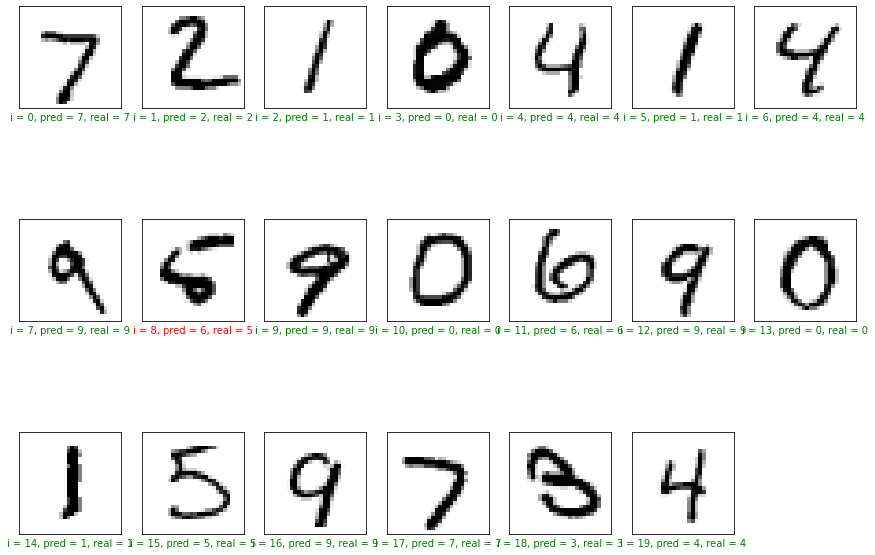

In [55]:
plt.figure(figsize = (15,15))

start_index = 0

for i in range (20):
    plt.subplot(4, 7, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(prediccion[start_index + i])
    gt = y_test[start_index + i ]
    
    col = 'g'
    if pred != gt:
        col = 'r'
        
    plt.xlabel('i = {}, pred = {}, real = {}'.format(start_index + i, pred, gt), color = col)
    plt.imshow(X_test[start_index + i], cmap = 'binary')
plt.show()

Al momento de graficar las imágenes manuscritas de los primeros 19 dígitos, junto a sus respectivos índices (i), predicción realizada por el modelo (pred) y la etiqueta real (real); observamos que de los primeros 19 elementos, el modelo confundió tan solo 1 dígito (valores en color rojo), el modelo clasifico un 5 cuando en realidad la etiqueta de la imagen decía que era un 6.

# Conclusiones

Se puede concluir que el modelo de redes neuronales de 3 capas alcanzo un buen rendimiento en el conjunto de datos de prueba. Con una perdida (loss) del 9.75%, una exactitud (accuracy) del 96.92% y un recall (sensibilidad) del 96.44%, nos indica que el modelo tiene un buen desempeño en clasificar correctamente las imágenes en las diferentes categorías.

Además, el hecho de que el conjunto de entrenamiento contenga 60.000 imágenes y el de prueba 10.000 es una buena relación para poder evaluar el rendimiento del modelo con un conjunto de datos independiente.

En cuanto a la arquitectura de la red neuronal, la utilización de 3 capas con una función de activación ReLU en las primeras dos capas y una función softmax en la última capa es una elección común para problemas de clasificación multiclase. El uso de un tamaño de lote de 32 imágenes en el entrenamiento es un buen punto de partida para este tipo de problemas y puede contribuir a una convergencia rápida del modelo.

En resumen, el rendimiento del modelo es muy bueno. Sin embargo, siempre es recomendable comparar con otros modelos y considerar el contexto de la aplicación para determinar si es adecuado para la tarea específica.